prerequisites

In [26]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


%matplotlib inline

loading data. let's try using the OG classic Titanic dataset, for the sake of simplicity.

In [15]:
df_train = pd.read_csv('sampledata/train.csv')
df_test = pd.read_csv('sampledata/test.csv')
df_all = pd.concat([df_train, df_test])
df_all.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171


checking data distributions

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


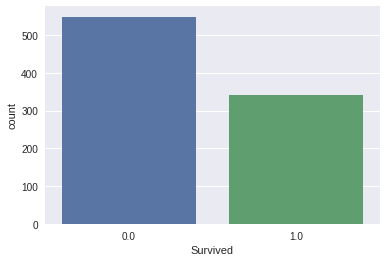

In [18]:
display(df_all.describe())
ax = sns.countplot(x="Survived", data=df_all)

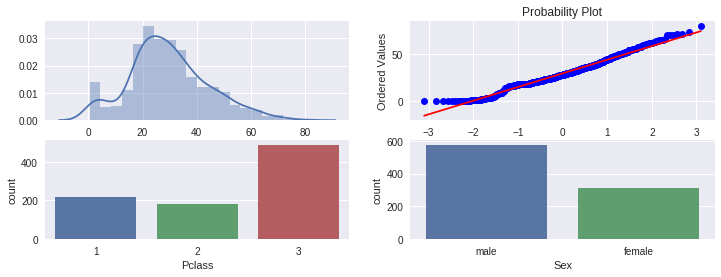

In [70]:
### Checking distributions of the features
df = df_train[['Age', 'Sex', 'Pclass', 'Survived']]

fig,axes=plt.subplots(2,2)
fig.set_size_inches(12,4)

tmp = df_train['Age'].dropna().tolist()
sns.distplot(tmp, ax = axes[0,0])
p = stats.probplot(tmp, dist="norm", plot=axes[0,1])

sns.countplot(x='Pclass', data=df_train, ax = axes[1,0])

sns.countplot(x='Sex', data=df_train, ax = axes[1,1])

Correlation & Heatmap

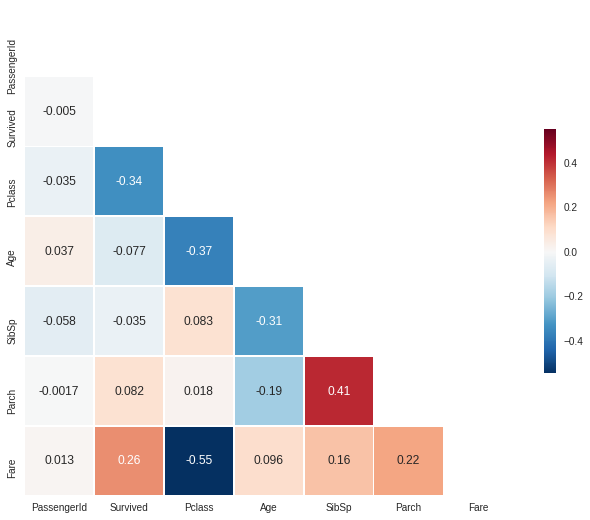

In [86]:
sns.set(style="white")

corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

statistical tests!